In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

C:\Users\krishnamk\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
benz = pd.read_csv("train.csv")
benz.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
benz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [4]:
benz.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [5]:
obj = benz.select_dtypes(object)
obj

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [6]:
colu = obj.columns
benzdf = pd.get_dummies(benz,columns=colu,drop_first=True)
benzdf

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,8406,108.77,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,8412,109.22,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,8415,87.48,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
benzdf.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.023759,0.027798,0.052031,0.060584,0.028273,0.028273,0.046092,0.046567,0.024947,0.027560
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.152314,0.164412,0.222117,0.238595,0.165771,0.165771,0.209709,0.210734,0.155981,0.163728
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
y = benzdf['y']
X = benzdf.iloc[:,2:]

In [9]:
X

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
pca = PCA()
pca.fit_transform(X)

variance_ratio_cum_sum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(variance_ratio_cum_sum)

[11.42 19.27 26.67 32.57 37.55 41.78 45.12 47.97 50.51 52.68 54.77 56.51
 58.02 59.46 60.84 62.14 63.35 64.44 65.42 66.34 67.23 68.08 68.91 69.69
 70.44 71.14 71.82 72.47 73.11 73.73 74.29 74.84 75.36 75.84 76.31 76.75
 77.18 77.6  78.01 78.41 78.79 79.17 79.54 79.89 80.24 80.58 80.9  81.21
 81.51 81.8  82.08 82.35 82.61 82.87 83.11 83.35 83.59 83.83 84.06 84.28
 84.5  84.72 84.93 85.14 85.35 85.55 85.75 85.95 86.15 86.34 86.53 86.72
 86.91 87.09 87.27 87.45 87.63 87.81 87.99 88.16 88.33 88.5  88.67 88.84
 89.01 89.17 89.33 89.49 89.65 89.81 89.97 90.13 90.28 90.43 90.58 90.73
 90.88 91.02 91.16 91.3  91.44 91.58 91.72 91.85 91.98 92.11 92.24 92.37
 92.49 92.61 92.73 92.85 92.97 93.09 93.2  93.31 93.42 93.53 93.64 93.75
 93.85 93.95 94.05 94.15 94.25 94.35 94.45 94.54 94.63 94.72 94.81 94.9
 94.99 95.08 95.17 95.25 95.33 95.41 95.49 95.57 95.65 95.73 95.81 95.89
 95.96 96.03 96.1  96.17 96.24 96.31 96.38 96.45 96.52 96.59 96.65 96.71
 96.77 96.83 96.89 96.95 97.01 97.07 97.13 97.18 97.

Text(0, 0.5, 'Cumulative explained variance')

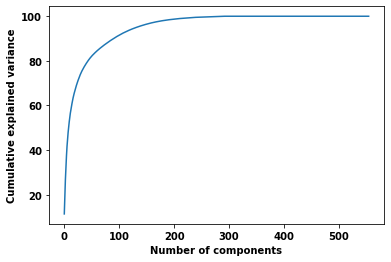

In [11]:
plt.plot(variance_ratio_cum_sum)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [12]:
pca = PCA(n_components=90)
pca.fit(X)
X = pca.transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.817092,-1.359265,1.939803,0.853478,1.622783,-0.043883,0.554807,-0.996328,0.204935,-0.291399,...,0.244211,-0.198490,0.456366,-0.288829,0.503336,0.010716,0.103325,0.129431,-0.138610,0.293831
1,-0.101499,-1.294395,-0.091489,-0.798066,0.283724,0.142604,1.108107,-0.729348,-0.021378,0.617966,...,0.064611,-0.057813,-0.251092,0.041102,0.328890,0.218612,0.163163,-0.225356,-0.068332,0.005149
2,-0.668524,-2.434781,1.698086,2.350910,0.325666,3.751923,-1.188095,0.670799,-0.932893,-0.213913,...,0.218126,0.035892,-0.229923,-0.091767,0.129644,0.160684,-0.313916,0.128150,-0.025019,0.157629
3,-0.473694,-2.720429,0.416054,2.879830,-0.511009,3.760519,-0.306703,-0.032686,-1.235689,0.253637,...,-0.161242,-0.126382,-0.166349,0.073404,-0.074647,0.004235,0.077387,-0.016151,-0.169631,-0.009357
4,-0.508665,-2.710780,0.225744,3.100796,-0.751432,3.860358,-0.450389,0.126022,-1.798756,-0.298384,...,0.099200,-0.235141,-0.051007,0.063385,0.100796,-0.019095,0.100209,-0.106126,-0.197109,0.222848


Text(0.5, 1.0, 'Correlation between different features')

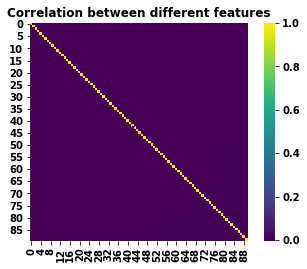

In [13]:
correlation = pd.DataFrame(X).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

In [14]:
benz_final = pd.concat([X,y],1)
benz_final

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,y
0,0.817092,-1.359265,1.939803,0.853478,1.622783,-0.043883,0.554807,-0.996328,0.204935,-0.291399,...,-0.198490,0.456366,-0.288829,0.503336,0.010716,0.103325,0.129431,-0.138610,0.293831,130.81
1,-0.101499,-1.294395,-0.091489,-0.798066,0.283724,0.142604,1.108107,-0.729348,-0.021378,0.617966,...,-0.057813,-0.251092,0.041102,0.328890,0.218612,0.163163,-0.225356,-0.068332,0.005149,88.53
2,-0.668524,-2.434781,1.698086,2.350910,0.325666,3.751923,-1.188095,0.670799,-0.932893,-0.213913,...,0.035892,-0.229923,-0.091767,0.129644,0.160684,-0.313916,0.128150,-0.025019,0.157629,76.26
3,-0.473694,-2.720429,0.416054,2.879830,-0.511009,3.760519,-0.306703,-0.032686,-1.235689,0.253637,...,-0.126382,-0.166349,0.073404,-0.074647,0.004235,0.077387,-0.016151,-0.169631,-0.009357,80.62
4,-0.508665,-2.710780,0.225744,3.100796,-0.751432,3.860358,-0.450389,0.126022,-1.798756,-0.298384,...,-0.235141,-0.051007,0.063385,0.100796,-0.019095,0.100209,-0.106126,-0.197109,0.222848,78.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,-2.306274,0.694319,1.668849,-1.267648,0.929652,0.455061,0.010216,-0.078816,0.348124,0.544711,...,0.023896,-0.098480,-0.026400,-0.111135,0.073646,-0.328018,0.208970,0.028158,0.008343,107.39
4205,0.953549,-0.241916,0.043403,1.627617,1.810702,-0.501711,2.687120,-0.903163,-1.054477,-0.446499,...,-0.013536,-0.091947,0.416598,-0.097795,-0.241001,-0.162142,0.178180,-0.079391,-0.283257,108.77
4206,-1.034418,-0.484181,1.800688,0.073166,-0.788340,0.608051,2.088358,-2.012175,1.692075,0.135826,...,0.054059,0.151234,0.050773,-0.137676,0.155194,0.044458,0.040529,0.060036,0.035170,109.22
4207,0.390266,-1.172539,-3.104142,1.145840,0.028118,-0.730724,-0.173815,-0.893748,-0.198002,0.587220,...,-0.014018,-0.039840,0.103459,0.249028,0.454237,-0.070162,-0.035700,0.143581,-0.196174,87.48


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
xgmodel = xgb.XGBRegressor()
xgmodel.fit(X_train,y_train)
print(xgmodel)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


In [18]:
y_xgpred = xgmodel.predict(data=X_test)
xg_df = pd.DataFrame()
xg_df["Prediction"] = y_xgpred
xg_df["Actual"] = y_test.values
xg_df

,Prediction,Actual
0,99.769600,97.94
1,89.336731,96.41
2,114.591576,105.83
3,77.424721,79.09
4,111.163483,108.69
...,...,...
1258,94.655418,115.25
1259,100.609909,88.59
1260,102.943756,92.90
1261,94.805016,98.24


In [20]:
xgb_mse = mean_squared_error(xg_df["Actual"],xg_df["Prediction"])**(0.5)
xgb_mae = mean_absolute_error(y_true=xg_df["Actual"], y_pred=xg_df["Prediction"])
print('XGB MAE: {}'.format(xgb_mae))
print('XGB RMSE: {}'.format(xgb_mse))

XGB MAE: 6.619785182829047
XGB RMSE: 10.797760301676517


In [21]:
y_avg = np.array([y_test.mean()] * len(y_test))
null_mse = mean_squared_error(y_true=xg_df["Actual"], y_pred=y_avg)**0.5
null_mae = mean_absolute_error(y_true=xg_df["Actual"], y_pred=y_avg)
print('Null MAE: {}'.format(null_mae))
print('Null MSE: {}'.format(null_mse))

Null MAE: 10.313586309663737
Null MSE: 13.37075648151259


In [23]:
ranmodel = RandomForestRegressor()
ranmodel.fit(X_train,y_train)
print(ranmodel)
y_ranpred = ranmodel.predict(X_test)
ran_df = pd.DataFrame()
ran_df["Prediction"] = y_ranpred
ran_df["Actual"] = y_test.values
print(ran_df)
ran_rmse = mean_squared_error(ran_df["Actual"],ran_df["Prediction"])**(0.5)
ran_mae = mean_absolute_error(y_true=ran_df["Actual"], y_pred=ran_df["Prediction"])
print('RandomForest MAE: {}'.format(ran_mae))
print('RandomForest RMSE: {}'.format(ran_rmse))

C:\Users\krishnamk\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
      Prediction  Actual
0       102.9180   97.94
1        90.9400   96.41
2       113.5440  105.83
3        80.1745   79.09
4       108.5520  108.69
...          ...     ...
1258     95.0550  115.25
1259     97.8270   88.59
1260     91.4390   92.90
1261     92.5710   98.24
1262    105.5370   91.46

[1263 rows x 2 columns]
RandomForest MAE: 6.693938982146998
RandomForest RMSE: 10.594126204310374


In [54]:
from sklearn.linear_model import Lasso
lasmodel = Lasso()
lasmodel.fit(X_train,y_train)
print(lasmodel)
y_laspred = lasmodel.predict(X_test)
las_df = pd.DataFrame()
las_df["Prediction"] = y_linpred
las_df["Actual"] = y_test.values
print(lin_df)
las_rmse = mean_squared_error(las_df["Actual"],las_df["Prediction"])**(0.5)
las_mae = mean_absolute_error(y_true=las_df["Actual"], y_pred=las_df["Prediction"])
print('LassoRegression MAE: {}'.format(las_mae))
print('lasssoRegression RMSE: {}'.format(las_rmse))

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
      Prediction  Actual
0      91.788046   97.94
1      98.187588   96.41
2     105.601488  105.83
3      87.145130   79.09
4     107.016463  108.69
...          ...     ...
1258   98.870778  115.25
1259   99.277659   88.59
1260   99.135538   92.90
1261  103.080192   98.24
1262   97.543033   91.46

[1263 rows x 2 columns]
LassoRegression MAE: 6.732859488180065
lasssoRegression RMSE: 10.656664667880293


In [33]:
Adamodel = AdaBoostRegressor()
Adamodel.fit(X_train,y_train)
print(Adamodel)
y_Adapred = Adamodel.predict(X_test)
Ada_df = pd.DataFrame()
Ada_df["Prediction"] = y_Adapred
Ada_df["Actual"] = y_test.values
print(Ada_df)
Ada_rmse = mean_squared_error(Ada_df["Actual"],Ada_df["Prediction"])**(0.5)
Ada_mae = mean_absolute_error(y_true=Ada_df["Actual"], y_pred=Ada_df["Prediction"])
print('AdaBoostRegression MAE: {}'.format(Ada_mae))
print('AdaBoostRegression RMSE: {}'.format(Ada_rmse))

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)
      Prediction  Actual
0     103.173571   97.94
1     101.180570   96.41
2     115.459049  105.83
3      96.142505   79.09
4     106.032701  108.69
...          ...     ...
1258  101.336524  115.25
1259  105.048727   88.59
1260  102.805804   92.90
1261  103.298863   98.24
1262  108.722282   91.46

[1263 rows x 2 columns]
AdaBoostRegression MAE: 9.667385718846885
AdaBoostRegression RMSE: 12.478376467162006


In [35]:
svmmodel = svm.SVR()
svmmodel.fit(X_train,y_train)
print(svmmodel)
y_svmpred = svmmodel.predict(X_test)
svm_df = pd.DataFrame()
svm_df["Prediction"] = y_svmpred
svm_df["Actual"] = y_test.values
print(svm_df)
svm_rmse = mean_squared_error(svm_df["Actual"],svm_df["Prediction"])**(0.5)
svm_mae = mean_absolute_error(y_true=svm_df["Actual"], y_pred=svm_df["Prediction"])
print('svm MAE: {}'.format(svm_mae))
print('svm RMSE: {}'.format(svm_rmse))

C:\Users\krishnamk\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
      Prediction  Actual
0      89.963039   97.94
1      93.650023   96.41
2     107.975453  105.83
3      80.379532   79.09
4     109.483784  108.69
...          ...     ...
1258   95.933136  115.25
1259   94.639187   88.59
1260   93.565936   92.90
1261   94.930082   98.24
1262   93.611687   91.46

[1263 rows x 2 columns]
svm MAE: 5.716704646479701
svm RMSE: 10.300307388965683


#Grid Search CV

In [63]:
from sklearn import model_selection
from sklearn.pipeline import Pipeline

first_models = [xgmodel,ranmodel,linmodel,Adamodel,svmmodel]
first_model_names = ['xgb','rf','lr', 'adaboost','svm']
n_folds = 5
skf = model_selection.ShuffleSplit(n_splits = n_folds, test_size = .3, train_size = .7, random_state = 42 )

In [60]:
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']
                 }  

RF_param_grid = {
                
               'rf__n_estimators': [100,200], #default=10
            'rf__criterion': ['gini', 'entropy'], #default=”gini”
            'rf__max_depth': [2,4,8] ,#default=None
            'rf__oob_score': ['True']
}

XGB_param_grid = {
    'xgb__min_child_weight': [1, 5],
        'xgb__gamma': [0.5, 1],
        'xgb__max_depth': [3, 4, 5]
}

Adaboost_param_grid = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

Lasso_param_grid = {'alpha':[1.0,0.0,0.1,0.01,0.001]
                   }

In [66]:
from sklearn.model_selection import GridSearchCV
columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy']
params_grid = [RF_param_grid,svm_param_grid,XGB_param_grid,Adaboost_param_grid,Lasso_param_grid]

after_model_compare = pd.DataFrame(columns = columns)

row_index = 0
for n,alg in enumerate(first_models):
    print(alg)
    model_pipeline = Pipeline(steps=[(first_model_names[n], first_models[n])])
    
    gs_alg = GridSearchCV(model_pipeline, param_grid = params_grid[0], cv = skf, scoring = 'accuracy', n_jobs=-1,return_train_score=True)
    params_grid.pop(0)

    #set name and parameters
    model_name = alg.__class__.__name__
    after_model_compare.loc[row_index, 'Name'] = model_name
    
    gs_alg.fit(X, y)
   
    after_model_compare.loc[row_index, 'Parameters'] = str(gs_alg.best_params_)
 
    
    after_model_compare.loc[row_index, 'Train Accuracy Mean'] = gs_alg.cv_results_['mean_train_score'][gs_alg.best_index_]
    after_model_compare.loc[row_index, 'Test Accuracy'] = gs_alg.cv_results_['mean_test_score'][gs_alg.best_index_]
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained...')

after_model_compare

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


ValueError: Invalid parameter rf for estimator Pipeline(memory=None,
         steps=[('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1,
                              objective='reg:squarederror', random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))],
         verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.